# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | mejit
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | freetown
Processing Record 6 of Set 1 | taro
Processing Record 7 of Set 1 | fort bragg
Processing Record 8 of Set 1 | stanley
Processing Record 9 of Set 1 | matane
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | port said
Processing Record 12 of Set 1 | dum duma
Processing Record 13 of Set 1 | port douglas
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | dengzhou
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | wat

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.23,94,100,6.26,NZ,1717965200
1,port-aux-francais,-49.3500,70.2167,5.03,95,100,15.31,TF,1717965200
2,mejit,10.2753,170.8646,28.07,80,56,7.55,MH,1717965200
3,west island,-12.1568,96.8225,26.99,83,40,2.57,CC,1717965035
4,freetown,8.4840,-13.2299,26.81,79,7,2.36,SL,1717965200


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,94,100,6.26,NZ,1717965200
1,port-aux-francais,-49.3500,70.2167,5.03,95,100,15.31,TF,1717965200
2,mejit,10.2753,170.8646,28.07,80,56,7.55,MH,1717965200
3,west island,-12.1568,96.8225,26.99,83,40,2.57,CC,1717965035
4,freetown,8.4840,-13.2299,26.81,79,7,2.36,SL,1717965200


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

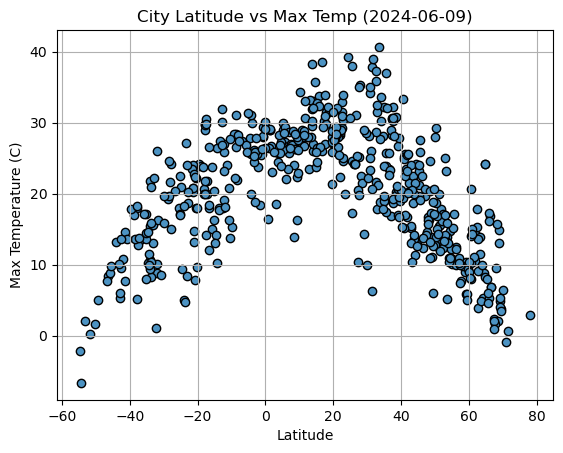

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', facecolors='#4C93C3')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temp (2024-06-09)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

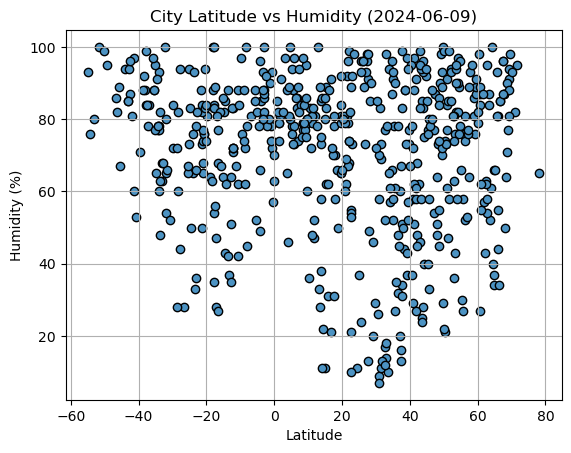

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', edgecolors='black', facecolors='#4C93C3')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2024-06-09)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

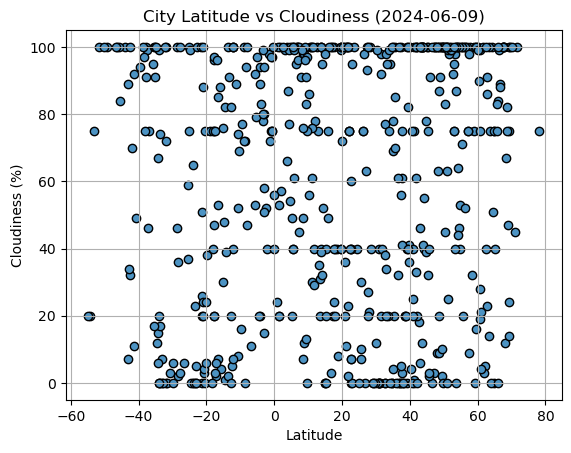

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', edgecolors='black', facecolors='#4C93C3')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2024-06-09)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

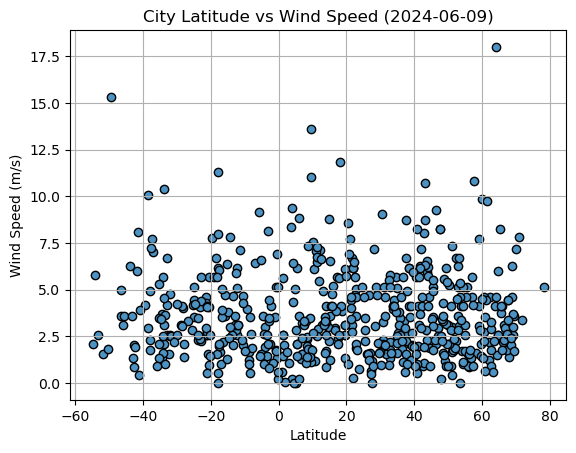

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', edgecolors='black', facecolors='#4C93C3')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2024-06-09)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.014655791728297602


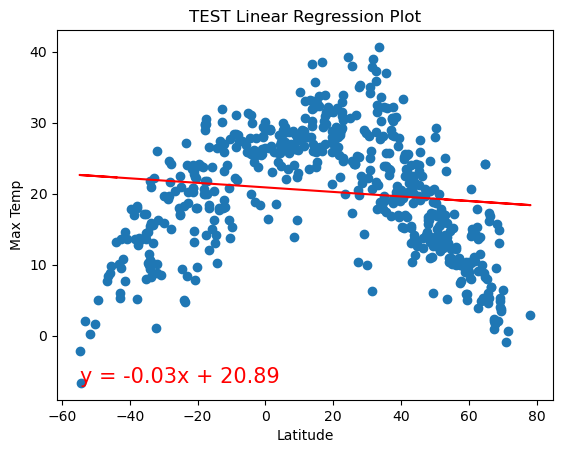

In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"

def plot_linear_regression(x_values, y_values, title, x_label, y_label):
    x_values = np.array(x_values)
    y_values = np.array(y_values)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f"The r-squared is: {rvalue**2}")

    plt.show()

plot_linear_regression(x_values, y_values, "TEST Linear Regression Plot", x_label, y_label)
# plot_linear_regression(x_values, y_values, f"Northern Hemisphere: {y_label} vs. {x_label}", x_label, y_label)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mejit,10.2753,170.8646,28.07,80,56,7.55,MH,1717965200
4,freetown,8.4840,-13.2299,26.81,79,7,2.36,SL,1717965200
6,fort bragg,35.1390,-79.0060,32.17,52,69,2.68,US,1717965201
7,stanley,54.8680,-1.6985,10.99,78,40,2.57,GB,1717965201
8,matane,48.8286,-67.5220,13.96,90,91,5.56,CA,1717965201


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.23,94,100,6.26,NZ,1717965200
1,port-aux-francais,-49.3500,70.2167,5.03,95,100,15.31,TF,1717965200
3,west island,-12.1568,96.8225,26.99,83,40,2.57,CC,1717965035
5,taro,-8.3862,115.2800,22.00,100,94,0.55,ID,1717965201
12,port douglas,-16.4833,145.4667,17.95,68,7,2.18,AU,1717965202


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5641683800068303


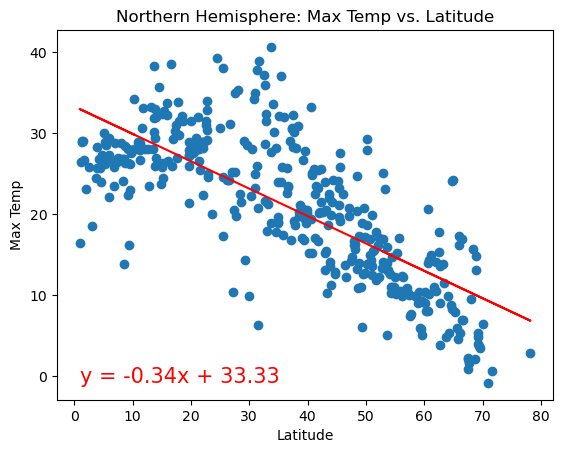

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"

# plot_linear_regression(x_values, y_values, "Northern Hemisphere: Max Temp vs. Latitude", x_label, y_label)
plot_linear_regression(x_values, y_values, f"Northern Hemisphere: {y_label} vs. {x_label}", x_label, y_label)

The r-squared is: 0.5707551295098188


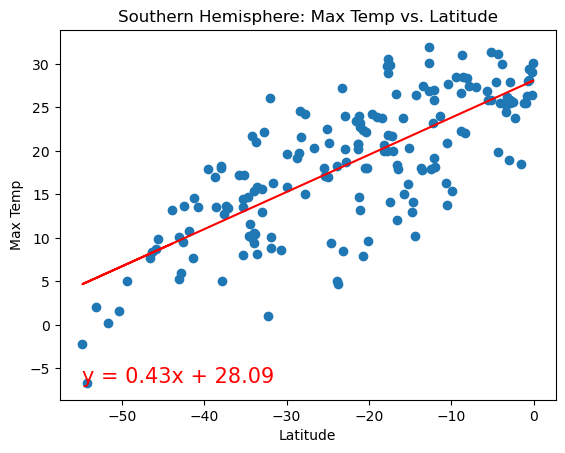

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp"

plot_linear_regression(x_values, y_values, f"Southern Hemisphere: {y_label} vs. {x_label}", x_label, y_label)

**Discussion about the linear relationship:** The R-squared values are relatively similar in the Northen hemisphere and Southern hemisphere datasets. Looking at the coefficient of each hemisphere, there is a negative relationship between Max Temperature and Latitute in the Northern hemisphere dataset, whereas the Southern Hemisphere coefficient shows a positive relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 1.4806890277185916e-05


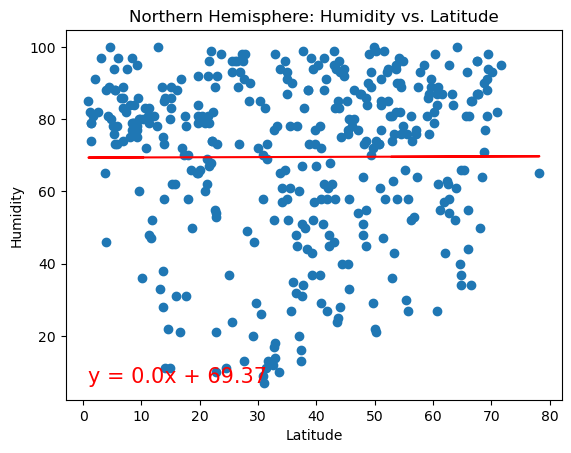

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"

plot_linear_regression(x_values, y_values, f"Northern Hemisphere: {y_label} vs. {x_label}", x_label, y_label)

The r-squared is: 0.0190319915029617


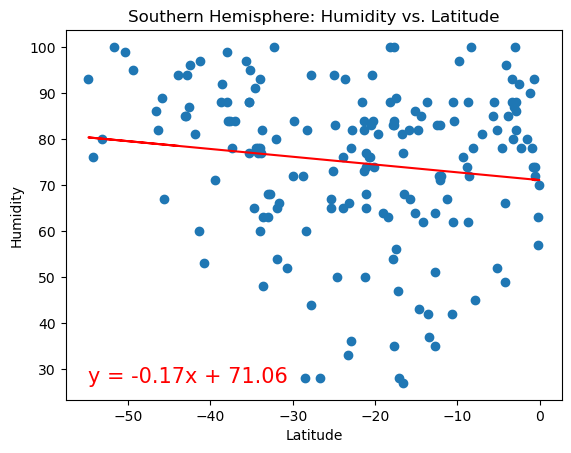

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"

plot_linear_regression(x_values, y_values, f"Southern Hemisphere: {y_label} vs. {x_label}", x_label, y_label)

**Discussion about the linear relationship:** The extremely low r-squared values, in both datasets (Northern Hemisphere and Southern Hemisphere) means that the latitude is not a good indicator to determine humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.002536539598922138


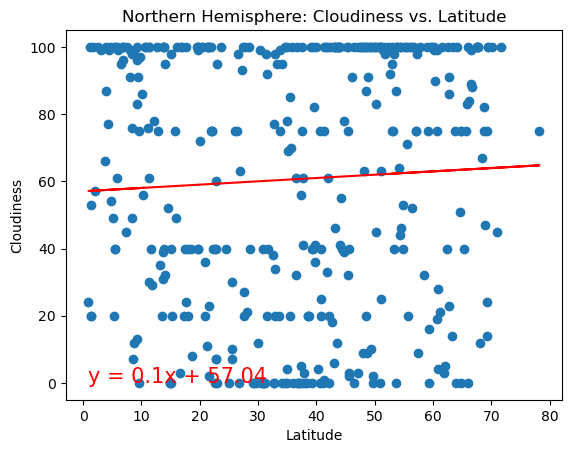

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"

plot_linear_regression(x_values, y_values, f"Northern Hemisphere: {y_label} vs. {x_label}", x_label, y_label)

The r-squared is: 0.0003040759667474702


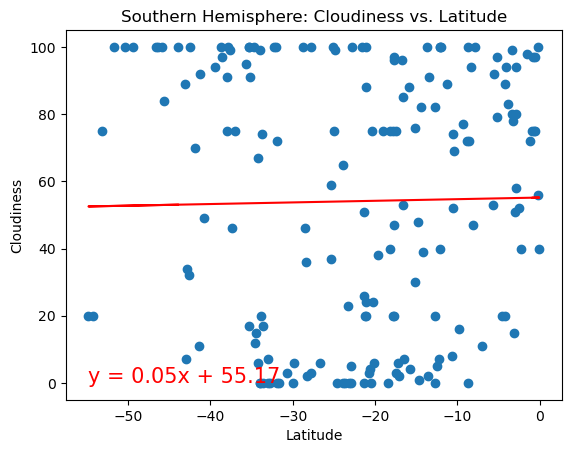

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"

plot_linear_regression(x_values, y_values, f"Southern Hemisphere: {y_label} vs. {x_label}", x_label, y_label)

**Discussion about the linear relationship:** The extremely low r-squared values, in both datasets (Northern Hemisphere and Southern Hemisphere) means that cloudiness is not strongly affected by latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 1.240836485741812e-05


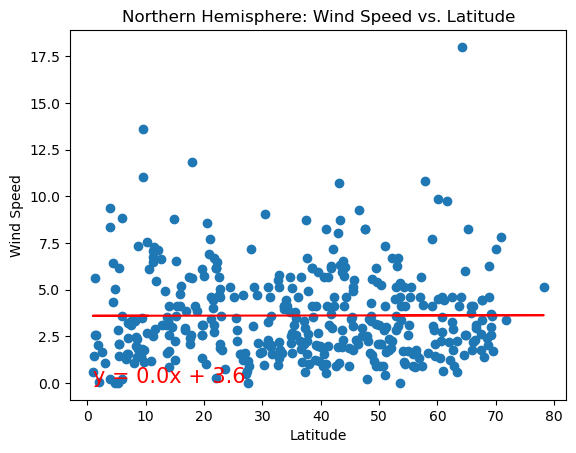

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"

plot_linear_regression(x_values, y_values, f"Northern Hemisphere: {y_label} vs. {x_label}", x_label, y_label)

The r-squared is: 0.013811929427668564


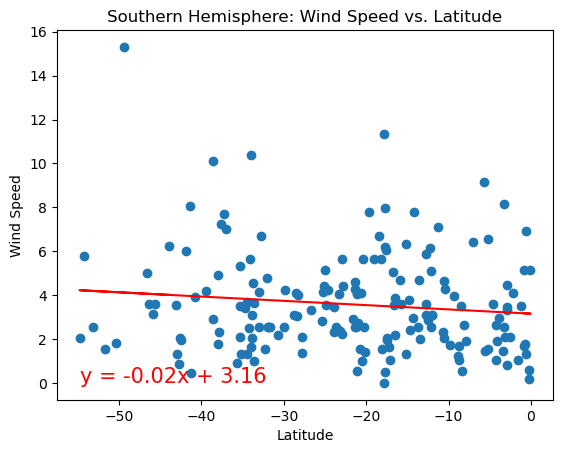

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"

plot_linear_regression(x_values, y_values, f"Southern Hemisphere: {y_label} vs. {x_label}", x_label, y_label)

**Discussion about the linear relationship:** The extremely low r-squared values, in both datasets (Northern Hemisphere and Southern Hemisphere) means that wind speed is not strongly affected by latitude.